## College Scorecard Exploration
This notebook cleans and explores the `merged_scorecard.csv` file from the Scorecard dataset.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import os
from pathlib import Path

df = pd.read_csv('../data/processed/merged_scorecard.csv')

C:\Users\cambe\AppData\Local\Temp\ipykernel_792\1938854254.py:9: DtypeWarning: Columns (1,9,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,

### Key Variables for College Tuition & Student Loan Debt Analysis

#### Institution Info
- `INSTNM`: Institution Name
- `CITY`, `STABBR`, `ZIP`: Location info
- `CONTROL`: Institution control 
(1=Public, 2=Private nonprofit, 3=Private for-profit)
- `ICLEVEL`: Institution level (1=4-year, 2=2-year)
- `HBCU`, `PBI`, `HSI`, `TRIBAL`: Flags for minority-serving institutions

#### Tuition / Cost
- `TUITIONFEE_IN`, `TUITIONFEE_OUT`: In-state / out-of-state tuition
- `COSTT4_A`, `COSTT4_P`: Total academic year cost
- `NPT4_PUB`, `NPT4_PRIV`: Net price (public/private)
- `NPT41_PUB` to `NPT45_PUB`: Net price for income groups:
  - $0–$30k
  - $30k–$48k
  - $48k–$75k
  - $75k–$110k
  - $110k+

#### Student Loan / Debt
- `DEBT_MDN`, `GRAD_DEBT_MDN`: Median debt for all/graduate borrowers  
- `LO_INC_DEBT_MDN`, `MD_INC_DEBT_MDN`, `HI_INC_DEBT_MDN`: Median debt by income  
- `CUML_DEBT_N`: Number of students in cumulative debt  
- `PCTFLOAN`: % of students receiving federal loans  
- `LOAN_EVER`, `PELL_EVER`: % of students receiving federal or Pell loans  
- `DEP_DEBT_MDN`: Median debt for dependent students  
- `IND_DEBT_MDN`: Median debt for independent students  
- `PELL_DEBT_MDN`: Median debt for Pell recipients  
- `NOPELL_DEBT_MDN`: Median debt for non-Pell recipients  
- `FEMALE_DEBT_MDN`: Median debt for female students  
- `MALE_DEBT_MDN`: Median debt for male students  
- `FIRSTGEN_DEBT_MDN`: Median debt for first-generation students  
- `NOTFIRSTGEN_DEBT_MDN`: Median debt for non-first-generation students  

#### Financial Aid / Income
- `PCTPELL`, `PELL_EVER`: Pell Grant recipients (%)
- `PAR_ED_PCT_1STGEN`: % of first-gen college students
- `INC_PCT_LO`, `INC_PCT_M1`, `INC_PCT_H1`: % of students in each income tier

#### Post-Graduation Earnings
- `MD_EARN_WNE_P10`, `MN_EARN_WNE_P10`: Median / mean earnings 10 years after entry
- `COUNT_WNE_INC1_P10`, `COUNT_WNE_INC2_P10`, `COUNT_WNE_INC3_P10`: Earnings tier counts
- `MD_EARN_WNE_INC1_P10`, `MD_EARN_WNE_INC2_P10`, `MD_EARN_WNE_INC3_P10`: Median earnings after 10 years for groups
  - $0-$30,000
  - $30,001-$75,000
  - $75,001+

####  Loan Repayment Metrics
- `BBRR1_FED_UG_PAIDINFULL`, `BBRR2_FED_UG_PAIDINFULL`, `BBRR3_FED_UG_PAIDINFULL`, `BBRR4_FED_UG_PAIDINFULL`: 1-, 2-, 3-, 4-year full repayment rate for federal loans.
- `RPY_1YR_RT`, `RPY_3YR_RT`: 1-year and 3-year repayment rates
- `COMPL_RPY_3YR_RT`: Repayment rate for completers
- `NONCOM_RPY_3YR_RT`: Repayment rate for non-completers

#### Enrollment / Demographics
- `UGDS`: Undergraduate enrollment total
- `UGDS_WHITE`, `UGDS_BLACK`, `UGDS_HISP`, `UGDS_ASIAN`: % by race/ethnicity
- `UGDS_AIAN`, `UGDS_NHPI`, `UGDS_2MOR`, `UGDS_UNKN`: Other race categories (American Indian/Native Alaskan, Native Hawaiian/Pacific Islander)
- `FEMALE`: Gender distribution (MALE = 1 - FEMALE)
- `VETERAN`: Share of veteran students
- `FIRST_GEN`: Share of first generation students
- `DEPENDENT`: Dependency status (INDEPENDENT = 1 - DEPENDENT)
- `AGE_ENTRY`: Average age of entry

#### Completion / Retention
- `RET_FT4`, `RET_PT4`: Retention (full-time, part-time)
- `C150_4`, `C150_L4`: Graduation within 150% of program time
- `WDRAW_ORIG_YR2_RT`: withdrawal by year 2
- `COMP_ORIG_YR2_RT`, `ENRL_ORIG_YR2_RT`: Completion/enrollment by year 2
- `D150_4`: Disaggregated 150% grad rate

In [12]:
columns_to_keep = [
    # Institution Info
    "INSTNM", "CITY", "STABBR", "ZIP", "CONTROL", "ICLEVEL", "HBCU", "PBI", "HSI", "TRIBAL",
    
    # Tuition / Cost
    "TUITIONFEE_IN", "TUITIONFEE_OUT", "COSTT4_A", "COSTT4_P", "NPT4_PUB", "NPT4_PRIV",
    "NPT41_PUB", "NPT42_PUB", "NPT43_PUB", "NPT44_PUB", "NPT45_PUB",
    
    # Student Loan / Debt
    "DEBT_MDN", "GRAD_DEBT_MDN", "LO_INC_DEBT_MDN", "MD_INC_DEBT_MDN", "HI_INC_DEBT_MDN",
    "CUML_DEBT_N", "PCTFLOAN", "LOAN_EVER", "PELL_EVER", "DEP_DEBT_MDN", "IND_DEBT_MDN",
    "PELL_DEBT_MDN", "NOPELL_DEBT_MDN", "FEMALE_DEBT_MDN", "MALE_DEBT_MDN",
    "FIRSTGEN_DEBT_MDN", "NOTFIRSTGEN_DEBT_MDN",
    
    # Financial Aid / Income
    "PCTPELL", "PELL_EVER", "PAR_ED_PCT_1STGEN", "INC_PCT_LO", "INC_PCT_M1", "INC_PCT_H1",
    
    # Post-Graduation Earnings
    "MD_EARN_WNE_P10", "MN_EARN_WNE_P10",
    "COUNT_WNE_INC1_P10", "COUNT_WNE_INC2_P10", "COUNT_WNE_INC3_P10",
    "MD_EARN_WNE_INC1_P10", "MD_EARN_WNE_INC2_P10", "MD_EARN_WNE_INC3_P10",
    
    # Loan Repayment Metrics
    "BBRR1_FED_UG_PAIDINFULL", "BBRR2_FED_UG_PAIDINFULL", "BBRR3_FED_UG_PAIDINFULL", 
    "BBRR4_FED_UG_PAIDINFULL", "RPY_1YR_RT", "RPY_3YR_RT", "COMPL_RPY_3YR_RT", "NONCOM_RPY_3YR_RT", 
    
    # Enrollment / Demographics
    "UGDS", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN",
    "UGDS_AIAN", "UGDS_NHPI", "UGDS_2MOR", "UGDS_UNKN", "FEMALE",
    "VETERAN", "FIRST_GEN", "DEPENDENT", "AGE_ENTRY",
    
    # Completion / Retention
    "RET_FT4", "RET_PT4", "C150_4", "C150_L4", "WDRAW_ORIG_YR2_RT",
    "COMP_ORIG_YR2_RT", "ENRL_ORIG_YR2_RT", "D150_4",
    
    # Scorecard year
    "Year"
]

#print(df.columns.tolist())

reduced_df = df[columns_to_keep].copy()

# Convert all column values to numeric (replace privacy suppressed data)
cols_to_convert = ['FEMALE', 'DEPENDENT', 'FIRST_GEN']
reduced_df[cols_to_convert] = reduced_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Compute MALE, INDEPENDENT, NON_FIRST_GEN with np.where to handle NaNs
reduced_df['MALE'] = np.where(reduced_df['FEMALE'].notna(), 1 - reduced_df['FEMALE'], np.nan)
reduced_df['INDEPENDENT'] = np.where(reduced_df['DEPENDENT'].notna(), 1 - reduced_df['DEPENDENT'], np.nan)
reduced_df['NON_FIRST_GEN'] = np.where(reduced_df['FIRST_GEN'].notna(), 1 - reduced_df['FIRST_GEN'], np.nan)

# Insert MALE after FEMALE
female_index = reduced_df.columns.get_loc('FEMALE')
reduced_df.insert(female_index + 1, 'MALE', reduced_df.pop('MALE'))

# Insert INDEPENDENT after DEPENDENT
dependent_index = reduced_df.columns.get_loc('DEPENDENT')
reduced_df.insert(dependent_index + 1, 'INDEPENDENT', reduced_df.pop('INDEPENDENT'))

# Insert NON_FIRST_GEN after FIRST_GEN
firstgen_index = reduced_df.columns.get_loc('FIRST_GEN')
reduced_df.insert(firstgen_index + 1, 'NON_FIRST_GEN', reduced_df.pop('NON_FIRST_GEN'))

# Reduce year col to 4 digits
reduced_df['Year'] = reduced_df['Year'].astype(str).str[:4].astype(int)

### Save the reduced dataframe

In [13]:
output_path = Path("../data/processed/reduced_scorecard.csv")

reduced_df.to_csv(output_path, index=False)
print(f"Saved reduced dataset to {output_path}")

Saved reduced dataset to ..\data\processed\reduced_scorecard.csv


#### Visualizations

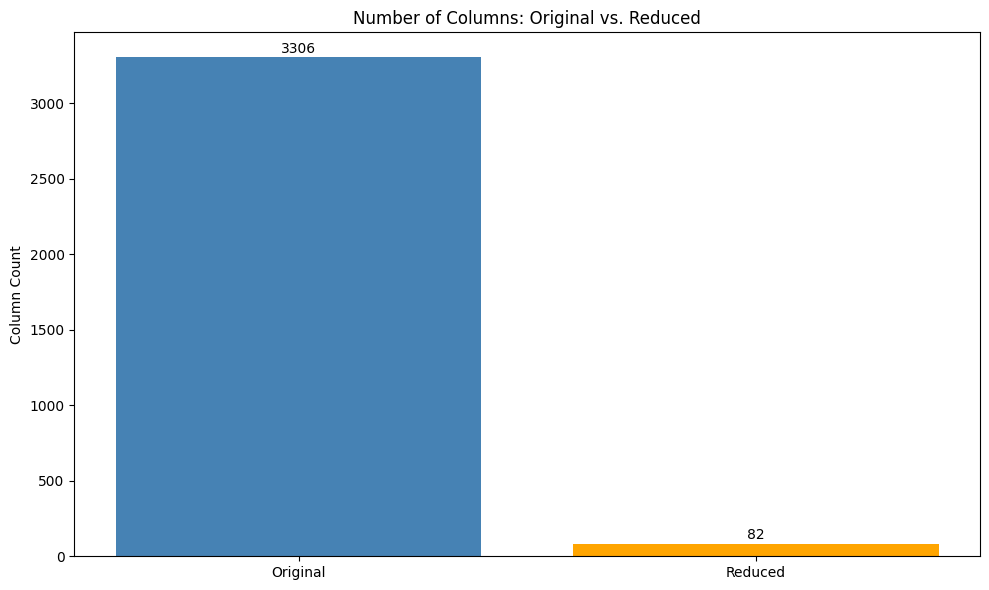

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(['Original', 'Reduced'], [df.shape[1], reduced_df.shape[1]], 
               color=['steelblue', 'orange'])

# Add text labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, f"{int(yval)}", 
             ha='center', va='bottom')
    
plt.title('Number of Columns: Original vs. Reduced')
plt.ylabel('Column Count')
plt.tight_layout()
plt.savefig('../visualizations/num_cols_hist.png', dpi=300, bbox_inches='tight')
plt.show()

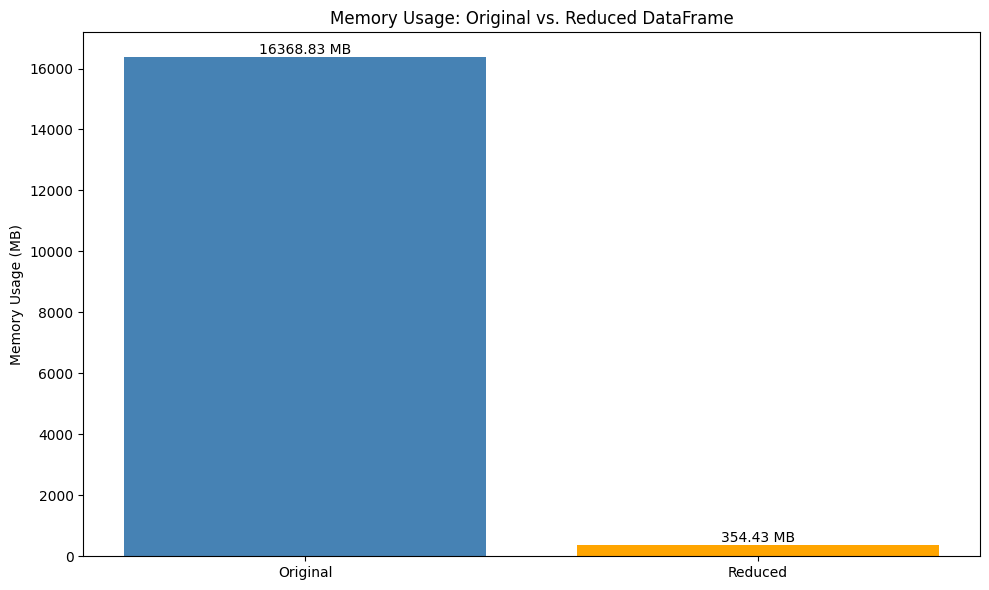

In [37]:
# Calculate memory usage in MB
original_memory = df.memory_usage(deep=True).sum() / (1024 ** 2)
reduced_memory = reduced_df.memory_usage(deep=True).sum() / (1024 ** 2)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(['Original', 'Reduced'], [original_memory, reduced_memory], color=['steelblue', 'orange'])

# Add text labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval:.2f} MB", ha='center', va='bottom')
    
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage: Original vs. Reduced DataFrame')
plt.tight_layout()
plt.savefig('../visualizations/memory_hist.png', dpi=300, bbox_inches='tight')
plt.show()

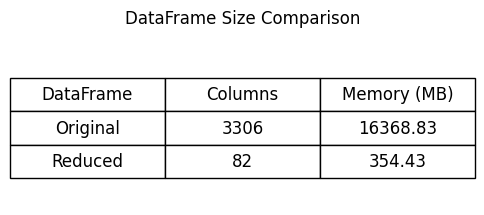

In [29]:
summary_df = pd.DataFrame({
    'DataFrame': ['Original', 'Reduced'],
    'Columns': [df.shape[1], reduced_df.shape[1]],
    'Memory (MB)': [round(original_memory, 2), round(reduced_memory, 2)]
})

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.title('DataFrame Size Comparison', pad=20)
plt.savefig('../visualizations/summary_table.png', dpi=300, bbox_inches='tight')
plt.show()

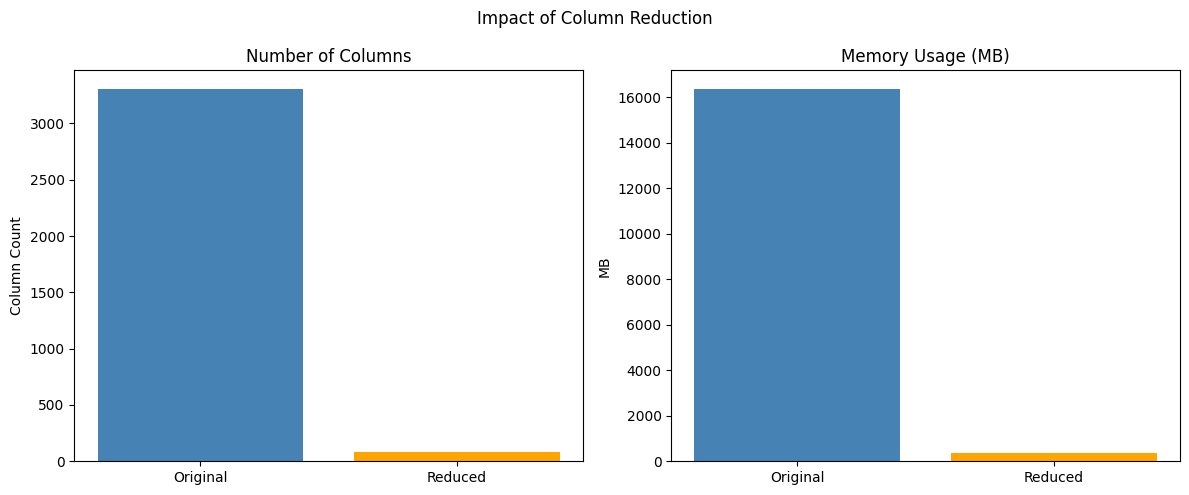

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Column count
axs[0].bar(['Original', 'Reduced'], [df.shape[1], reduced_df.shape[1]], color=['steelblue', 'orange'])
axs[0].set_title('Number of Columns')
axs[0].set_ylabel('Column Count')

# Memory usage
original_memory = df.memory_usage(deep=True).sum() / (1024 ** 2)
reduced_memory = reduced_df.memory_usage(deep=True).sum() / (1024 ** 2)
axs[1].bar(['Original', 'Reduced'], [original_memory, reduced_memory], color=['steelblue', 'orange'])
axs[1].set_title('Memory Usage (MB)')
axs[1].set_ylabel('MB')

plt.suptitle('Impact of Column Reduction')
plt.tight_layout()
plt.savefig('../visualizations/mem_cols_sidebyside.png', dpi=300, bbox_inches='tight')
plt.show()

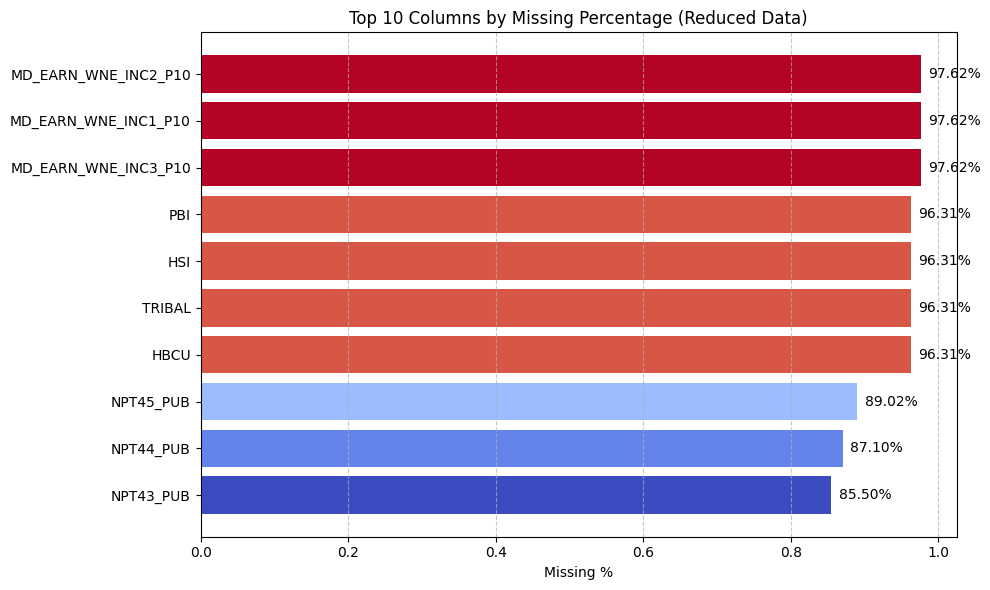

In [16]:
def get_missing_percentages(df):
    return df.isnull().mean().sort_values(ascending=False)

original_missing = get_missing_percentages(df)
reduced_missing = get_missing_percentages(reduced_df)

# Plot top 10 columns with the highest missingness (in reduced_df)
top_missing = reduced_missing.head(10)

# Normalize values for colormap
norm = plt.Normalize(top_missing.min(), top_missing.max())
colors = cm.coolwarm(norm(top_missing.values))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_missing.index, top_missing.values, color=colors)

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2%}', va='center')

plt.xlabel('Missing %')
plt.title('Top 10 Columns by Missing Percentage (Reduced Data)')
plt.gca().invert_yaxis()  # Highest value on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

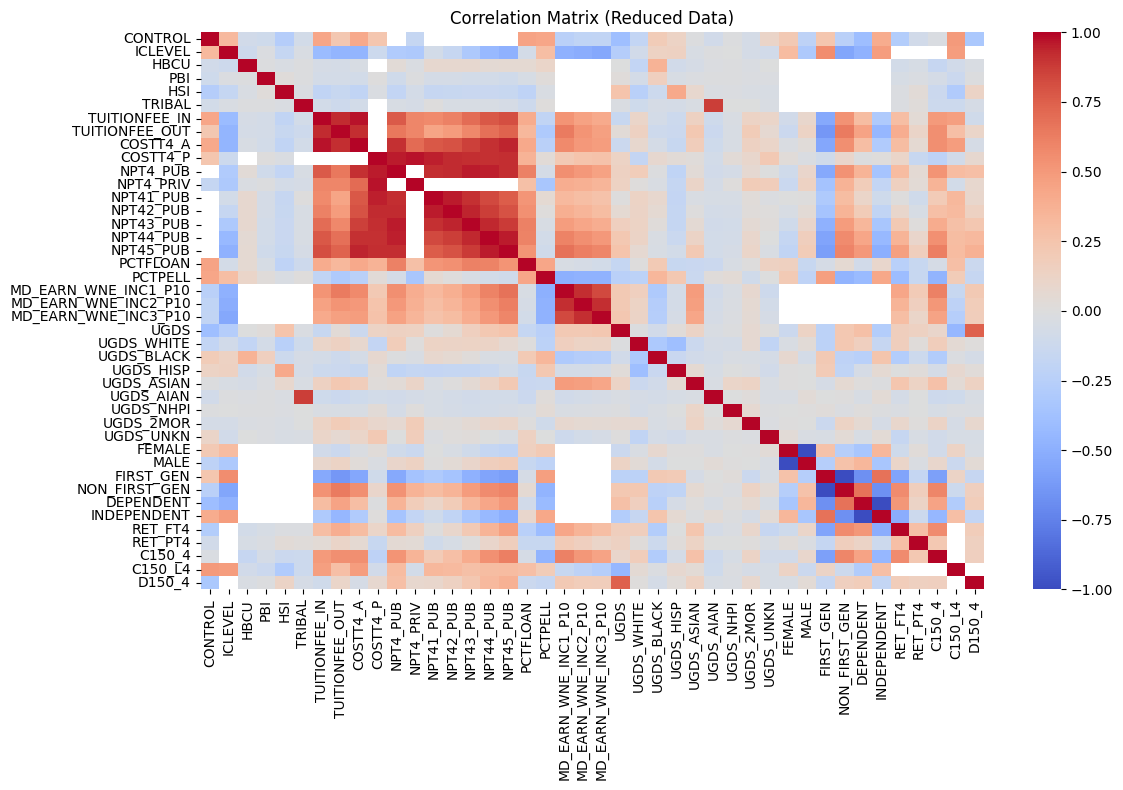

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(reduced_df.select_dtypes(include='number').corr(), 
            cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Reduced Data)')
plt.tight_layout()
plt.savefig('../visualizations/corr_matrix.png', dpi=300, 
            bbox_inches='tight')
plt.show()

### Heatmap Analysis

#### Strong Positive Correlations (red)

- These suggest variables increase together:
    - Tuition/Cost Variables (TUITIONFEE_IN, COSTT4_A, NPT4*_PUB, etc.):
        - As expected, all these show strong correlations among each other — institutions with high tuition tend to have high total costs and higher net prices across income tiers.

    - Earnings (MD_EARN_WNE_INC*):
        - Correlate positively with tuition and cost metrics, suggesting that higher-cost institutions may yield higher post-grad earnings — possibly due to school quality, resources, or selectivity.

    - DEPENDENT and FEMALE vs FIRST_GEN and PELL_EVER:
        - DEPENDENT students positively correlate with first-gen and Pell recipients, suggesting overlap between these groups (e.g. lower-income or younger students).

#### Strong Negative Correlations (blue)

- These show inverse relationships:
    - MALE vs FEMALE and INDEPENDENT vs DEPENDENT:
        - As expected, perfectly negatively correlated (close to -1) since one is the inverse of the other.

    - FEMALE vs post-grad earnings:
        - Slight negative correlation — possible gender pay gap reflected in the dataset (though causality isn’t implied).

    - PELL_EVER, PCTPELL vs income tiers and costs:
        - Negative correlation with TUITIONFEE_OUT, NPT4*_PUB, and income-specific net price variables.
        - Schools with more Pell recipients likely serve lower-income populations and tend to have lower sticker prices.

#### Neutral or Weak Correlations (white/gray)

- These often represent little to no linear relationship:

    - Race/Ethnicity demographics (UGDS_WHITE, UGDS_HISP, etc.) vs earnings and tuition variables:

        - Mixed, weak correlations — any influence may be mediated by other institutional or demographic variables.

#### Interesting Observations

- Net Price by Income Tier:
    - Strong intra-group correlations (NPT41_PUB to NPT45_PUB) reflect internal consistency — suggests that schools maintain proportional pricing across income bands.

- Retention & Completion (RET_FT4, C150_4):

    - Mild to moderate positive correlation with tuition and cost metrics — potentially signaling that higher-cost schools have better retention.

- UGDS_BLACK, UGDS_HISP, and PCTPELL:

    - Slight positive correlations hint at overlap between minority enrollment and financial aid recipients.

Variables dropped due to NaNs: ['CONTROL', 'ICLEVEL', 'HBCU', 'PBI', 'HSI', 'TRIBAL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'COSTT4_A', 'COSTT4_P', 'NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB', 'NPT42_PUB', 'NPT43_PUB', 'NPT44_PUB', 'NPT45_PUB', 'MD_EARN_WNE_INC1_P10', 'MD_EARN_WNE_INC2_P10', 'MD_EARN_WNE_INC3_P10', 'FEMALE', 'MALE', 'FIRST_GEN', 'NON_FIRST_GEN', 'DEPENDENT', 'INDEPENDENT', 'RET_FT4', 'RET_PT4', 'C150_4', 'C150_L4', 'D150_4']


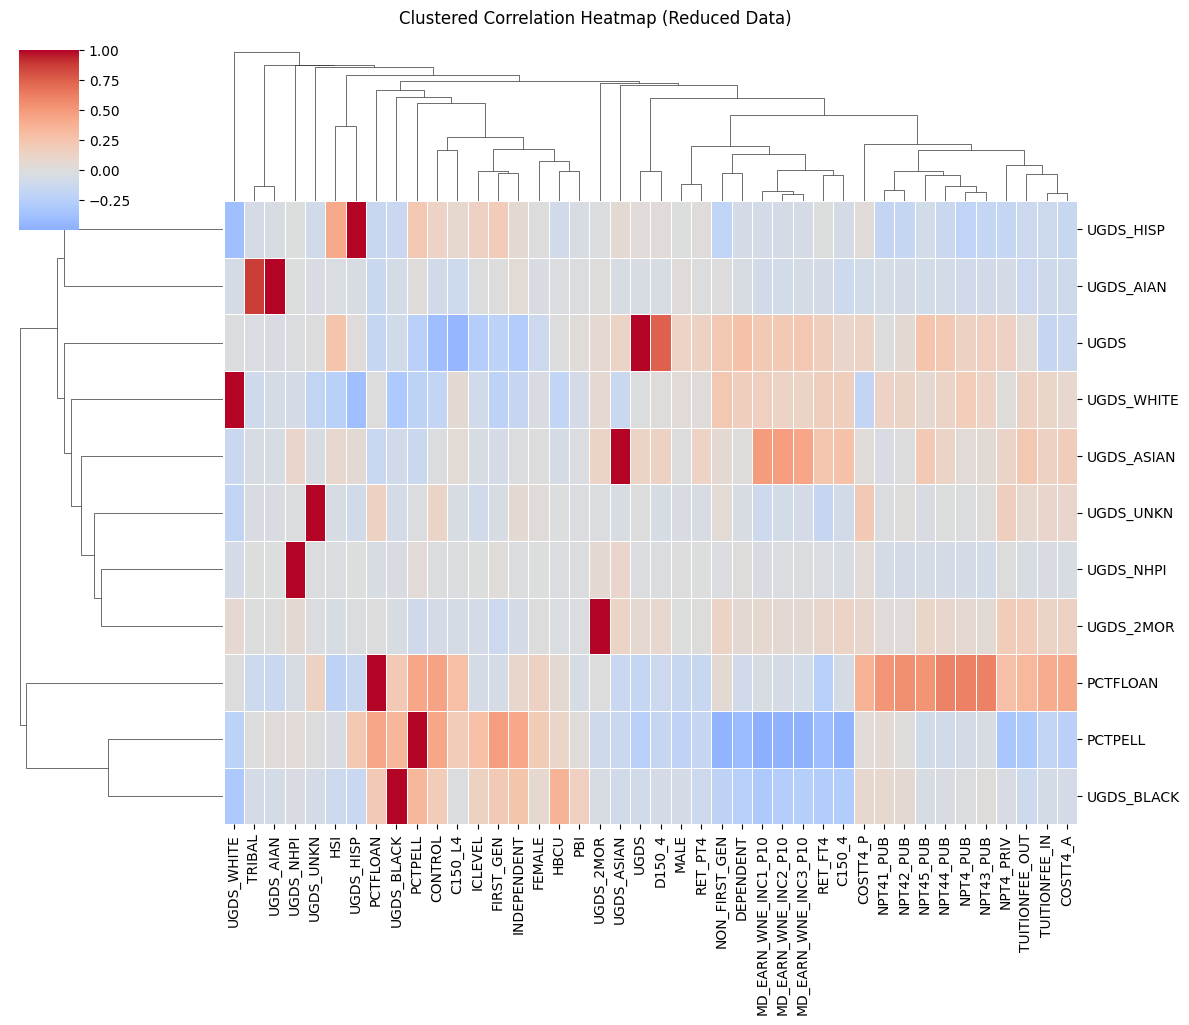

In [19]:
# Compute correlation matrix
corr = reduced_df.select_dtypes(include='number').corr()

missing_vars = corr[corr.isnull().any(axis=1)].index.tolist()
print("Variables dropped due to NaNs:", missing_vars)

# Replace inf/-inf with NaN, then drop any rows/columns with NaN
corr.replace([np.inf, -np.inf], np.nan, inplace=True)
corr.dropna(axis=0, how='any', inplace=True)
corr.dropna(axis=1, how='any', inplace=True)

# Create clustered heatmap
sns.clustermap(
    corr,
    cmap='coolwarm',
    center=0,
    figsize=(12, 10),
    linewidths=0.5,
    annot=False
)

plt.suptitle('Clustered Correlation Heatmap (Reduced Data)', y=1.02)
plt.show()